# File Information

Name: Amie Davis

Course: DSC550 - Data Mining

Assignment Number: 11.2

Purpose: Original Case Study

Usage: Python 3.7.6

   Developed using Jupter Notebook 6.0.3

# Case Study

## Description
Analyze data to determine factors that increase survival of breast cancer patients

## Narrative
With data science so prevalent during the ongoing pandemic, I wanted to dive into something in the medical field.  Unfortunately, most of the medical data I found was aggregated more than I wanted.  I realize a lot of this is done for protection of individuals, but it’s difficult to perform analysis, without knowing all the factors that went into the outcome.  I was looking for something that addresses individuals of varying demographics.
I found data from a study on breast cancer patients, originally from the Dutch Cancer Institute (NKI), which had already been cleaned and readied by Devi Ramanan. This dataset contained treatment details on individuals, along with a death indicator.  Using this data, I’d like to determine if some treatments were more effective than others.  I’d also like to consider the impact on various sizes and types of tumors.

## Data Summary
- 272 breast cancer patients. 
- Meta data includes patient info, treatment, and survival.

## Questions Considered
- Do certain therapies result in higher survival rate?
- Does combining therapies increase survival rate?
- Are death rates increased if only one therapy type is used?
- Does the death rate increase as the number of nodes increase?
- Does the death rate increase as the size of the tumor increases?
- Does the survival rate decrease as the grade increases?

# Graph Analysis

## Import required packages

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import yellowbrick

## Load Data

In [2]:
# Load data into dataframe
data_file = "C:\\Users\\amomu\\OneDrive\\Documents\\Data_Science\\DSC550\\final_proj\\NKI_Breat_Cancer_Data.csv"
df = pd.read_csv(data_file)

## Review Data

In [3]:
# Review Data Records
print(df.head())

  Patient  ID  age  eventdeath   survival  timerecurrence  chemo  hormonal  \
0    s122  18   43           0  14.817248       14.817248      0         0   
1    s123  19   48           0  14.261465       14.261465      0         0   
2    s124  20   38           0   6.644764        6.644764      0         0   
3    s125  21   50           0   7.748118        7.748118      0         1   
4    s126  22   38           0   6.436687        6.318960      0         0   

   amputation  histtype  diam  posnodes  grade  angioinv  lymphinfil  barcode  
0           1         1    25         0      2         3           1     6274  
1           0         1    20         0      3         3           1     6275  
2           0         1    15         0      2         1           1     6276  
3           0         1    15         1      2         3           1     6277  
4           1         1    15         0      2         2           1     6278  


Note that eventdeath is binary, 0 = No, 1 = Yes if patient died.

## Variable Selection

Select variables that might help predict who will survive.

- age = Age in years (numerical)
- eventdeath = Death indicator, 0 = No, 1 = Yes (categorical)
- chemo = Chemotherapy indicator, 0 = No, 1 = Yes (categorical)
- hormonal = Hormonal Therapy indicator, 0 = No, 1 = Yes (categorical)
- amputation = Amputation indicator, 0 = No, 1 = Yes (categorical)
- diam = Diameter of the primary tumor in mm (numerical) 	
- posnodes = Number of positive lymph nodes (numerical) 	
- grade: 1 = Well Differentiated, 2 = Intermediate, 3 = Poorly Differentiated (categorical)
- angioinv: Angioinvasion - Extent to which the cancer has invaded blood vessels or lymph vessels (categorical); 1 = Non-invasive, 2 = Questionable invasive, 3 = Clear-cut invasive
- timerecurrence: Recurrence time (numerical) 

## Summary Statistics

In [4]:
# Review summary statistics
print("Describe Data")
print(df.describe())

print()
print("Summarized Data")
print(df.describe(include=['O']))

Describe Data
               ID         age  eventdeath    survival  timerecurrence  \
count  272.000000  272.000000  272.000000  272.000000      272.000000   
mean   161.194853   44.047794    0.283088    8.080609        7.250433   
std     85.104899    5.464538    0.451329    3.904874        4.177462   
min     18.000000   26.000000    0.000000    0.711841        0.271047   
25%     86.750000   40.750000    0.000000    5.499738        4.389459   
50%    159.500000   45.000000    0.000000    7.359343        6.950034   
75%    235.250000   49.000000    1.000000   10.512662        9.986311   
max    312.000000   53.000000    1.000000   18.340862       18.340862   

            chemo    hormonal  amputation    histtype        diam    posnodes  \
count  272.000000  272.000000  272.000000  272.000000  272.000000  272.000000   
mean     0.393382    0.132353    0.441176    1.110294   22.529412    1.341912   
std      0.489401    0.339499    0.497443    0.545668    8.703345    2.108848   
min 

### Analysis
This tells me that of this study of 272 patients, there was a 28% death rate.  The patient's ages ranged from 26-53.  There may be an outlier in posnodes, as the maximum value is more than 6x the 3rd quartile.  Need more information to determine conclusions.

## Histograms

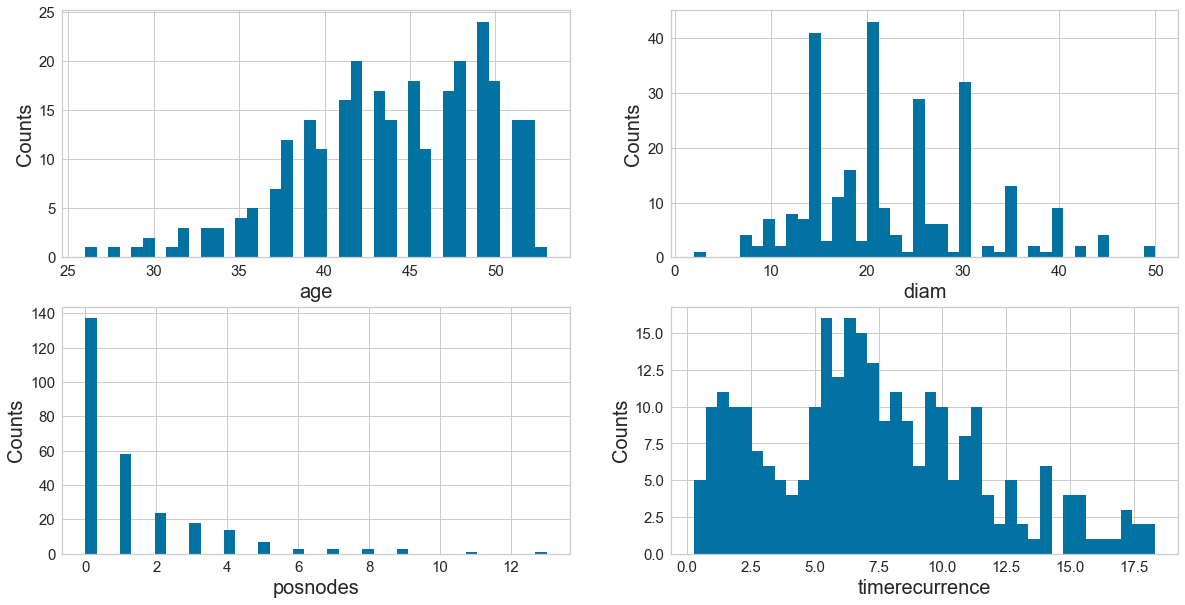

In [5]:
# Plot histograms for numeric variables

# Import packages
import matplotlib.pyplot as plt

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['age', 'diam', 'posnodes', 'timerecurrence']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.show()

### Analysis
No outliers stand out from the histograms.  The age distribution is negatively skewed.  The posnodes histogram shows no outliers after all.  Rather, posnodes shows a half-normal distribution.

## Bar Charts

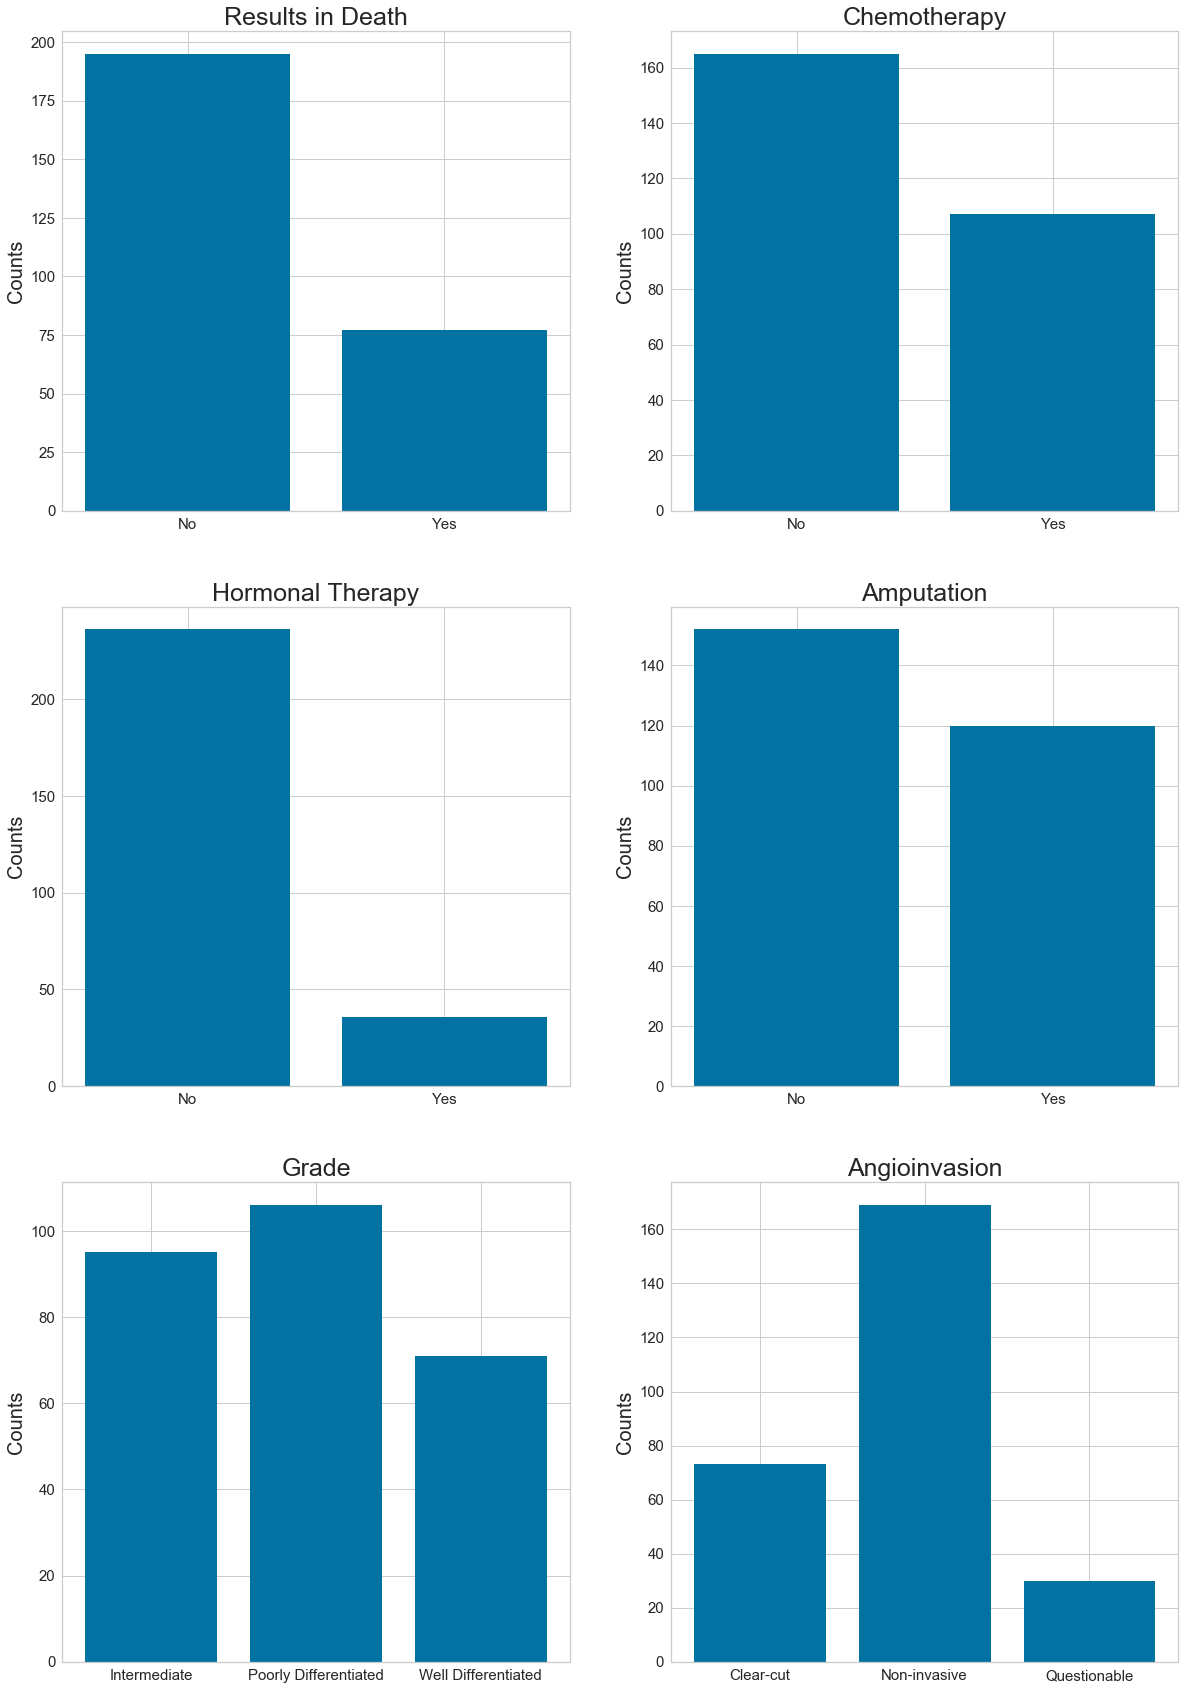

In [6]:
# Make bar charts for categorical variables.

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 30)

# Make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# Plot Death Indicator
# Replace category name
# Group by category
X_eventdeath = df.replace({'eventdeath': {1: 'Yes', 0: 'No'}}).groupby('eventdeath').size().reset_index(name='Counts')['eventdeath']
Y_eventdeath = df.replace({'eventdeath': {1: 'Yes', 0: 'No'}}).groupby('eventdeath').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 0].bar(X_eventdeath, Y_eventdeath)
axes[0, 0].set_title('Results in Death', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Plot Chemotherapy Indicator
# Replace category name
# Group by category
X_chemo = df.replace({'chemo': {1: 'Yes', 0: 'No'}}).groupby('chemo').size().reset_index(name='Counts')['chemo']
Y_chemo = df.replace({'chemo': {1: 'Yes', 0: 'No'}}).groupby('chemo').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 1].bar(X_chemo, Y_chemo)
axes[0, 1].set_title('Chemotherapy', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# Plot Hormonal Therapy Indicator
# Replace category name
# Group by category
X_hormonal = df.replace({'hormonal': {1: 'Yes', 0: 'No'}}).groupby('hormonal').size().reset_index(name='Counts')['hormonal']
Y_hormonal = df.replace({'hormonal': {1: 'Yes', 0: 'No'}}).groupby('hormonal').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 0].bar(X_hormonal, Y_hormonal)
axes[1, 0].set_title('Hormonal Therapy', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Plot Amputation Indicator
# Replace category name
# Group by category
X_amputation = df.replace({'amputation': {1: 'Yes', 0: 'No'}}).groupby('amputation').size().reset_index(name='Counts')['amputation']
Y_amputation = df.replace({'amputation': {1: 'Yes', 0: 'No'}}).groupby('amputation').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 1].bar(X_amputation, Y_amputation)
axes[1, 1].set_title('Amputation', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# Plot Grade
# Replace category name
# Group by category
X_grade = df.replace({'grade': {1: 'Well Differentiated', 2: 'Intermediate', 3: 'Poorly Differentiated'}}).groupby('grade').size().reset_index(name='Counts')['grade']
Y_grade = df.replace({'grade': {1: 'Well Differentiated', 2: 'Intermediate', 3: 'Poorly Differentiated'}}).groupby('grade').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[2, 0].bar(X_grade, Y_grade)
axes[2, 0].set_title('Grade', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

# Plot Angioinvasion
# Replace category name
# Group by category
X_angioinv = df.replace({'angioinv': {1: 'Non-invasive', 2: 'Questionable', 3: 'Clear-cut'}}).groupby('angioinv').size().reset_index(name='Counts')['angioinv']
Y_angioinv = df.replace({'angioinv': {1: 'Non-invasive', 2: 'Questionable', 3: 'Clear-cut'}}).groupby('angioinv').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[2, 1].bar(X_angioinv, Y_angioinv)
axes[2, 1].set_title('Angioinvasion', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)

### Analysis
The bar charts show a few things.  Few patients used hormonal therapy.  Distribution among grade was fairly even among patients.  Most cancer did not invade blood cells or lymph vessels.

## Correlation

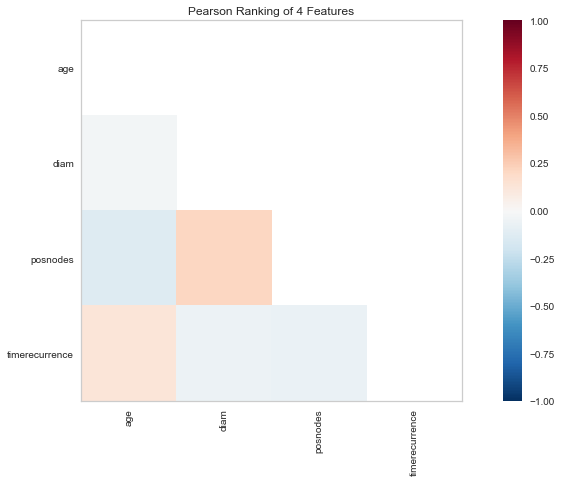

In [7]:
# To see if the data is correlated, use Pearson Ranking against the numerical features

# Import packages
from yellowbrick.features import Rank2D

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# Extract the values for the the numerical features
# Note that num_features was defined in 3.6 to represent the numerical features
# num_features = ['age', 'diam', 'posnodes', 'timerecurrence']
X = df[num_features].values

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.transform(X)    # Transform the data

# Draw/show/poof the data
visualizer.poof(outpath="C:\\Users\\amomu\\OneDrive\\Documents\\Data_Science\\DSC550\\final_proj\\pcoords1.png") 
plt.show()

### Analysis
The darker the color, the greater the correlation.  All blocks are barely shaded, so there is very little correlation among numerical features.

## Parallel Coordinates

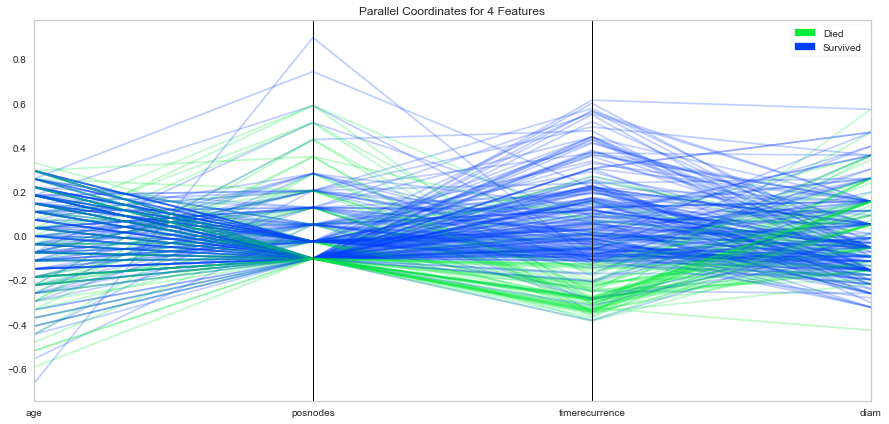

In [8]:
# Use Parallel Coordinates visualization to compare the distributions of numerical variables 
# between patients that died and those that survived.

# Import packages
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# Setup the color for yellowbrick visulizer
set_palette('sns_bright')

# Specify the features of interest and the classes of the target
classes = ['Survived', 'Died']

# Set numerical features in order for easier interpretation of the graphic
num_features = ['age', 'posnodes', 'timerecurrence', 'diam']


# Copy data to a new dataframe
df_norm = df.copy()

# Normalize data to 0-1 range
for feature in num_features:
    df_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the values for the the numerical features
X = df_norm[num_features].values
y = df.eventdeath.values

# Instantiate the Parallel Coordinates visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data

# Draw/show/poof the data
visualizer.poof(outpath="C:\\Users\\amomu\\OneDrive\\Documents\\Data_Science\\DSC550\\final_proj\\pcoords2.png") 
plt.show()


### Analysis
The parallel lines identify a positive correlation between age and posnodes.  The relationship between posnodes and timerecurrence is mostly positive.  However, the criss-crossed lines between timerecurrence and diam identify a negative relationship between those variables.

This chart also shows a low timerecurrence value for patients that died.  This makes sense because if a patient dies, they cannot have a recurrence of the condition.  Also of note, is an outlier where the youngest patient had the highest number of positive lymph nodes.  Age and diameter don't appear to show differentiation between survival and death.

## Stacked Bar Charts

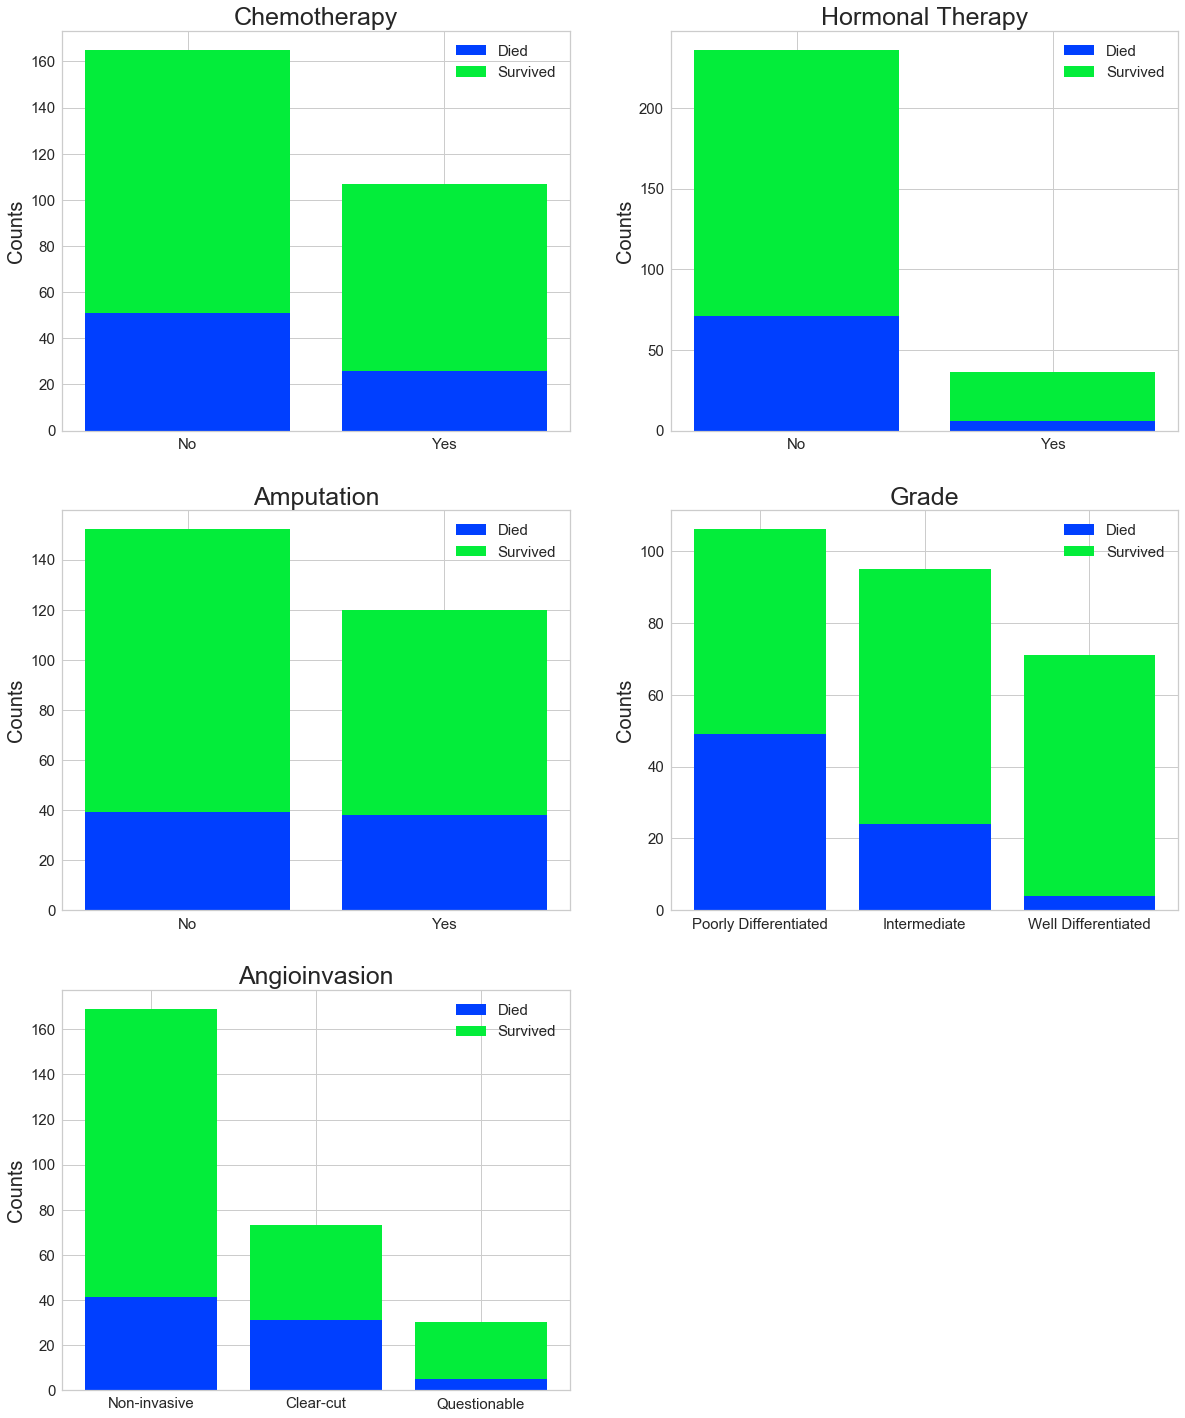

In [9]:
# Use Stack Bar Charts to compare patients who died to patients who survived
# based on the other categorical variables.

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

# Make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# Plot Chemotherapy Indicator
# Replace category name
# Group by Death
chemo_died = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'chemo': {0: 'No', 1: 'Yes'}})[df['eventdeath']==1]['chemo'].value_counts()
chemo_survived = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'chemo': {0: 'No', 1: 'Yes'}})[df['eventdeath']==0]['chemo'].value_counts()
chemo_survived = chemo_survived.reindex(index = chemo_died.index)

# Make the bar plot
p1 = axes[0, 0].bar(chemo_died.index, chemo_died.values)
p2 = axes[0, 0].bar(chemo_survived.index, chemo_survived.values, bottom=chemo_died.values)
axes[0, 0].set_title('Chemotherapy', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Died', 'Survived'), fontsize = 15)

# Plot Hormonal Therapy Indicator
# Replace category name
# Group by Death
hormonal_died = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'hormonal': {0: 'No', 1: 'Yes'}})[df['eventdeath']==1]['hormonal'].value_counts()
hormonal_survived = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'hormonal': {0: 'No', 1: 'Yes'}})[df['eventdeath']==0]['hormonal'].value_counts()
hormonal_survived = hormonal_survived.reindex(index = hormonal_died.index)

# Make the bar plot
p3 = axes[0, 1].bar(hormonal_died.index, hormonal_died.values)
p4 = axes[0, 1].bar(hormonal_survived.index, hormonal_survived.values, bottom=hormonal_died.values)
axes[0, 1].set_title('Hormonal Therapy', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Died', 'Survived'), fontsize = 15)

# Plot Amputation Indicator
# Replace category name
# Group by Death
amputation_died = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'amputation': {0: 'No', 1: 'Yes'}})[df['eventdeath']==1]['amputation'].value_counts()
amputation_survived = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'amputation': {0: 'No', 1: 'Yes'}})[df['eventdeath']==0]['amputation'].value_counts()
amputation_survived = amputation_survived.reindex(index = amputation_died.index)

# Make the bar plot
p5 = axes[1, 0].bar(amputation_died.index, amputation_died.values)
p6 = axes[1, 0].bar(amputation_survived.index, amputation_survived.values, bottom=amputation_died.values)
axes[1, 0].set_title('Amputation', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Died', 'Survived'), fontsize = 15)

# Plot Grade
# Replace category name
# Group by Death
grade_died = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'grade': {1: 'Well Differentiated', 2: 'Intermediate', 3: 'Poorly Differentiated'}})[df['eventdeath']==1]['grade'].value_counts()
grade_survived = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'grade': {1: 'Well Differentiated', 2: 'Intermediate', 3: 'Poorly Differentiated'}})[df['eventdeath']==0]['grade'].value_counts()
grade_survived = grade_survived.reindex(index = grade_died.index)

# Make the bar plot
p7 = axes[1, 1].bar(grade_died.index, grade_died.values)
p8 = axes[1, 1].bar(grade_survived.index, grade_survived.values, bottom=grade_died.values)
axes[1, 1].set_title('Grade', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Died', 'Survived'), fontsize = 15)

# Plot Angioinvasion
# Replace category name
# Group by Death
angioinv_died = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'angioinv': {1: 'Non-invasive', 2: 'Questionable', 3: 'Clear-cut'}})[df['eventdeath']==1]['angioinv'].value_counts()
angioinv_survived = df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}}).replace({'angioinv': {1: 'Non-invasive', 2: 'Questionable', 3: 'Clear-cut'}})[df['eventdeath']==0]['angioinv'].value_counts()
angioinv_survived = angioinv_survived.reindex(index = angioinv_died.index)

# Make the bar plot
p9 = axes[2, 0].bar(angioinv_died.index, angioinv_died.values)
p10 = axes[2, 0].bar(angioinv_survived.index, angioinv_survived.values, bottom=angioinv_died.values)
axes[2, 0].set_title('Angioinvasion', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p9[0], p10[0]), ('Died', 'Survived'), fontsize = 15)

# Remove unneeded axes since there is an odd number of plots
plt.delaxes(axes[2, 1])


### Analysis
This is a quick visualization to determine what therapies had higher success rates.  Patients with or without chemotherapy had similar results.  Those with hormonal therapy were less likely to die, although the representative sample is pretty small.  Those with amputation showed a lower survival rate.  There was a higher death rate for those whose grade was rated poorly differentiated and a higher survival rate for those whose grade was well differentiated.

# Dimensionality and Feature Reduction

## Import required packages

In [10]:
import numpy as np
import thinkstats2
import thinkplot

## Eliminate features

In [11]:
# Remove Patient, ID, & barcode, since they are irrelevant.
# Survival time and recurrence time are not needed, since they are results not contributing factors.
# Remove lymphinfil & histtype since data mappings for category codes could not be found.

# Reload original data since na values were dropped in Step 6 for histogram
addr1 = "C:\\Users\\amomu\\OneDrive\\Documents\\Data_Science\\DSC550\\final_proj\\NKI_Breat_Cancer_Data.csv"
df = pd.read_csv(addr1)

# Print original columns to see difference
print('Original Columns:')
print(df.columns)

# Drop unneeded columns
df.drop(['Patient', 'ID', 'barcode', 'survival', 'timerecurrence', 'histtype', 'lymphinfil'], axis=1, inplace = True)

# Verify Change
print()
print('New Columns:')
print(df.columns)

Original Columns:
Index(['Patient', 'ID', 'age', 'eventdeath', 'survival', 'timerecurrence',
       'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes',
       'grade', 'angioinv', 'lymphinfil', 'barcode'],
      dtype='object')

New Columns:
Index(['age', 'eventdeath', 'chemo', 'hormonal', 'amputation', 'diam',
       'posnodes', 'grade', 'angioinv'],
      dtype='object')


## Handle Missing Values

In [12]:
# Find features with missing values
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
age           0
eventdeath    0
chemo         0
hormonal      0
amputation    0
diam          0
posnodes      0
grade         0
angioinv      0
dtype: int64


### Analysis
No missing values found.

## Review Distributions

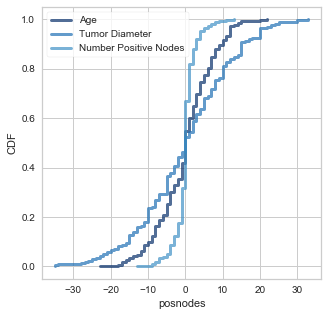

<Figure size 576x432 with 0 Axes>

In [26]:
# Adjust non-normal distributions for numerical features

# Review Cumulative Distribution Function (CDF) plots
# to identify non-normal distributions that can be adjusted

plt.rcParams['figure.figsize'] = (5, 5)

#age
diffs = df.age.diff()
cdf = thinkstats2.Cdf(diffs, label='Age')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='age', ylabel='CDF')

#diam
diffs = df.diam.diff()
cdf = thinkstats2.Cdf(diffs, label='Tumor Diameter')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='diam', ylabel='CDF')

#posnodes
diffs = df.posnodes.diff()
cdf = thinkstats2.Cdf(diffs, label='Number Positive Nodes')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='posnodes', ylabel='CDF')

### Analysis
All result in a sigmoid curve, so normal distribution is implied.  No exponential, lognormal, or pareto distribution is represented.

## Encoding

In [14]:
# Convert categorical data to numbers 
# eventdeath, chemo, hormonal, amputation, grade, angioinv

# Get categorical data
cat_features = ['eventdeath', 'chemo', 'hormonal', 'amputation', 'grade', 'angioinv']
df_cat = df[cat_features]

print('Data Before Encoding:')
print(df_cat.head(8))

# Note that the cleaned dataset has already converted categories to numeric data, so no further transformation is needed.

Data Before Encoding:
   eventdeath  chemo  hormonal  amputation  grade  angioinv
0           0      0         0           1      2         3
1           0      0         0           0      3         3
2           0      0         0           0      2         1
3           0      0         1           0      2         3
4           0      0         0           1      2         2
5           0      1         0           1      1         1
6           0      1         1           0      1         1
7           0      1         0           0      2         2


## Standardization

In [15]:
# Standardize Data
from sklearn import preprocessing

print('Original df')
print('=============================')
print(df.head())

# Convert df to numpy array
x = df.values

# Create scaler
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the feature
x_scaled = min_max_scaler.fit_transform(x)

# Convert back to Pandas dataframe
std_df = pd.DataFrame(x_scaled, columns = ['age', 'eventdeath', 'chemo', 'hormonal', 'amputation', 'diam', 'posnodes', 'grade', 'angioinv'])

print()
print('Standardized df')
print('=============================')
print(std_df.head())

Original df
   age  eventdeath  chemo  hormonal  amputation  diam  posnodes  grade  \
0   43           0      0         0           1    25         0      2   
1   48           0      0         0           0    20         0      3   
2   38           0      0         0           0    15         0      2   
3   50           0      0         1           0    15         1      2   
4   38           0      0         0           1    15         0      2   

   angioinv  
0         3  
1         3  
2         1  
3         3  
4         2  

Standardized df
        age  eventdeath  chemo  hormonal  amputation      diam  posnodes  \
0  0.629630         0.0    0.0       0.0         1.0  0.479167  0.000000   
1  0.814815         0.0    0.0       0.0         0.0  0.375000  0.000000   
2  0.444444         0.0    0.0       0.0         0.0  0.270833  0.000000   
3  0.888889         0.0    0.0       1.0         0.0  0.270833  0.076923   
4  0.444444         0.0    0.0       0.0         1.0  0.270833

## Feature Reduction

In [16]:
# Reduce features using Principal Components
from sklearn.decomposition import PCA

pca=PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(x_scaled)

print("Original number of features:", x_scaled.shape[1])
print("Reduced number of features:", features_pca.shape[1])

# Convert Principle Components to DataFrame
principal_df = pd.DataFrame(data = features_pca, columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 
                                                            'pc_6', 'pc_7', 'pc_8', 'pc_9'])
print(principal_df.head())

# Amount of information or variance each principal component holds
print()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Original number of features: 9
Reduced number of features: 9
       pc_1      pc_2      pc_3      pc_4      pc_5      pc_6      pc_7  \
0  0.463701 -0.069181 -0.685787  2.328836 -0.258745 -0.489320  0.471803   
1 -0.101585 -0.777708  1.109256  1.738361  0.931666 -0.925288 -0.527769   
2 -1.265640 -0.559138  0.155075 -0.175336 -0.007252 -0.532602  1.151756   
3 -0.503750 -0.095353  0.872496  1.987087  1.870986  1.997088  0.301329   
4  0.019418 -0.116508 -1.086980  1.271753 -0.297443 -0.633563  1.287782   

       pc_8      pc_9  
0 -0.001367 -0.600788  
1  0.390564  0.066458  
2  0.366335 -0.018896  
3  0.606061  0.452042  
4  1.188762 -0.344883  

Explained variation per principal component: [0.23008249 0.21561271 0.19292705 0.11961366 0.09235161 0.08806344
 0.02876757 0.01982969 0.01275177]


### Analysis
Note that once I removed histtype and lymphinfil, pca did not remove any features.  When included, one feature was removed.  The first 3 principal components hold aboout 20% of the information each.

## Principal Component Analysis (PCA)

<Figure size 1440x1800 with 0 Axes>

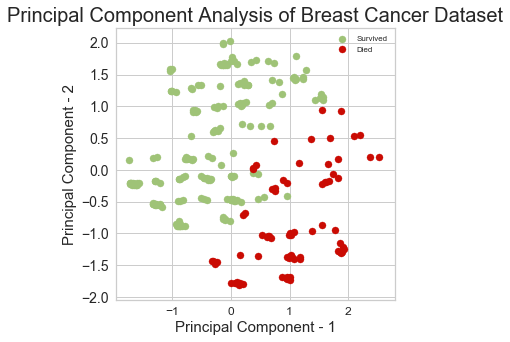

In [17]:
# Plot principal components

# Create target dataset
# Replace category name
data_model_y = std_df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}})['eventdeath']

# Show top 2 principal components on scatterplot
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Survived', 'Died']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = data_model_y == target
    plt.scatter(principal_df.loc[indicesToKeep, 'pc_1'],
                principal_df.loc[indicesToKeep, 'pc_2'],
                c = color, s = 50)

plt.legend(targets,prop={'size': 8})

## Analysis
Just by looking at principal components 1 and 2, you can see the delineation between survival classification in the plot and the clusters that form.

# Model Evaluation and Selection

## Import required packages

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

## Review Standardized Data

In [19]:
# Convert back to Pandas dataframe
std_df = pd.DataFrame(std_df, columns = ['age', 'eventdeath', 'chemo', 'hormonal', 'amputation', 'diam', 'posnodes', 'grade', 'angioinv'])

print()
print('Standardized df')
print('=============================')
print(std_df.head())


Standardized df
        age  eventdeath  chemo  hormonal  amputation      diam  posnodes  \
0  0.629630         0.0    0.0       0.0         1.0  0.479167  0.000000   
1  0.814815         0.0    0.0       0.0         0.0  0.375000  0.000000   
2  0.444444         0.0    0.0       0.0         0.0  0.270833  0.000000   
3  0.888889         0.0    0.0       1.0         0.0  0.270833  0.076923   
4  0.444444         0.0    0.0       0.0         1.0  0.270833  0.000000   

   grade  angioinv  
0    0.5       1.0  
1    1.0       1.0  
2    0.5       0.0  
3    0.5       1.0  
4    0.5       0.5  


## Split Dataset

In [20]:
# Split your data into two sets: Training and Testing.

# Separate target from features dataset
features_model =  ['age', 'chemo', 'hormonal', 'amputation', 'diam', 'posnodes', 'grade', 'angioinv']

# Create features dataset
data_model_X = std_df[features_model]

# Create target dataset
# Replace category name
#data_model_y = std_df.replace({'eventdeath': {1: 'Died', 0: 'Survived'}})['eventdeath']

# Split the data into training and validation datasets
# Save 30% for validation
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# Check details of the datasets
print("No. of samples in original set: ", data_model_X.shape[0])
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set: ", X_val.shape[0])

# Check distribution of each set
# Died and Survived
print('\n')
print('No. of Died and Survived in the original set:')
print(data_model_y.value_counts())

print('\n')
print('No. of Died and Survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Died and Survived in the validation set:')
print(y_val.value_counts())


No. of samples in original set:  272
No. of samples in training set:  190
No. of samples in validation set:  82


No. of Died and Survived in the original set:
Survived    195
Died         77
Name: eventdeath, dtype: int64


No. of Died and Survived in the training set:
Survived    137
Died         53
Name: eventdeath, dtype: int64


No. of Died and Survived in the validation set:
Survived    58
Died        24
Name: eventdeath, dtype: int64


## Build Model

In [21]:
# Run a Logistic Regression Model to predict if a patient survives

# Instantiate the classification model 
model = LogisticRegression()

## Model Evaluation

### Confusion Matrix

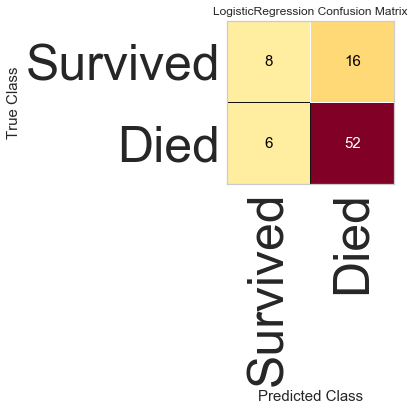

In [22]:
# Use Confusion Matrix to evaluate the model 

# The ConfusionMatrix visualizer is a ScoreVisualizer that takes a scikit-learn classifier 
# and a set of test X and y values and returns a report showing how each of the test values predicted 
# classes compare to their actual classes.

# Set up the figure size
plt.rcParams['figure.figsize'] = (3, 3)

classes = ['Survived','Died']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fit the passed model
cm.fit(X_train, y_train)
  
# Score runs predict() and creates the confusion_matrix
cm.score(X_val, y_val)
       
# Change font for labels
for label in cm.ax.texts:
    label.set_size(15)

# Set label fonts
plt.xlabel('False Class',fontsize=15)
plt.ylabel('Predicted Class',fontsize=15)
    
# Draw plot
cm.poof()

#### Analysis
- Accuracy = (True Positives + True Negatives)/All
- Accuracy = (8+52)/(8+16+6+52)
- Accuracy = 73%.  Not too shabby.

### Classification Report

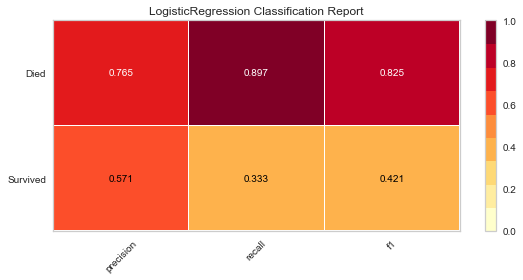

In [23]:
# Use Precision, Recall & F1 score to evaluate the model
# Create a Report of Evaluation Metrics

# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 10

# Instantiate the ClassificationReport visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data

g = visualizer.poof()

#### Analysis
The darker, the better.  Predictions for death were better than predictions for survival.  It's better to be given a bleak outlook and survive than be given a good outlook and die.  For this reason, I think the model is useable.

### ROC Curve

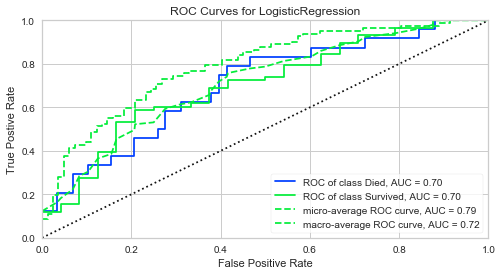

In [24]:
# Use the ROC curve and Area Under the Curve (AUC) to evaluate the model

#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

#### Analysis
The better a model is, the higher the curve and the greater the AUC.  This visual shows an average model, between ideal and random.

# Conclusion

The most interesting observation I discovered was the low use yet good outcome of hormonal therapy.  A correlation between age and number of positive lymph nodes was found using parallel coordinates, but no other correlations were identified.  I was able to reduce features to simplify visualizations using a manual process.  Although the accuracy of the model was only 73%, reduction of features increased the accuracy.

# References

## Data Source
https://data.world/deviramanan2016/nki-breast-cancer-data

## Data Definitions
https://www.scirp.org/journal/paperinformation.aspx?paperid=84902,

https://www.researchgate.net/publication/335211007_Prognostic_value_of_microvessel_density_in_stage_II_and_III_colon_cancer_patients_a_retrospective_cohort_study

https://www.researchgate.net/publication/340326136_Histopathologic_Assessment_of_Capsular_Invasion_in_Follicular_Thyroid_Neoplasms-an_Observer_Variation_Study

https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html

## This file contains code for use with Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT